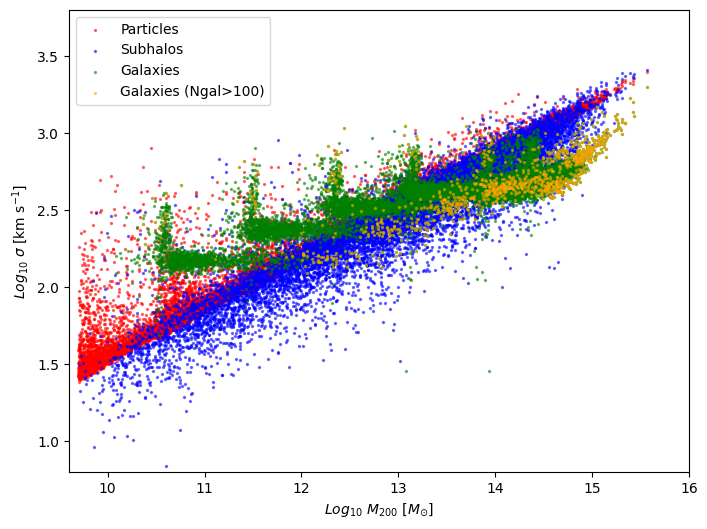

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt("./data/mass_particles_veldisp.txt", skiprows=1)
data2 = np.loadtxt("./data/mass_subhalos_veldisp.txt", skiprows=1)
data3 = np.loadtxt("./data/mass_galaxies_veldisp.txt", skiprows=1)

x1, y1 = data1[:, 0], data1[:, 1]  # particles
x2, y2 = data2[:, 0], data2[:, 1]  # subhalos
x3, y3, z3 = data3[:, 0], data3[:, 1], data3[:, 2] # galaxies

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color='r', s=2, alpha=0.5, label='Particles')
ax.scatter(x2, y2, color='b', s=2, alpha=0.5, label='Subhalos')
ax.scatter(x3, y3, color='g', s=2, alpha=0.5, label='Galaxies')
ax.scatter(x3[z3>100], y3[z3>100], color='orange', s=2, alpha=0.5, label='Galaxies (Ngal>100)')

plt.ylim(0.8,3.8) 
plt.xlim(9.6,16) 
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend()
plt.show()

In [8]:
import h5py
import os

# Define the base directory for input files
input_base_dir = '/fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/'
# input_base_dir = '/fred/oz009/achandro/shark_output/L500_N512_2LPT_Ming/lagos23/76/'
# input_base_dir = '/fred/oz009/achandro/shark_output/L250_N512_2LPT_Ming/lagos23/76/'
# input_base_dir = '/fred/oz009/achandro/shark_output/L125_N512_2LPT_Ming/lagos23/76/'
# input_base_dir = '/fred/oz009/achandro/shark_output/L62pt5_N512_2LPT_Ming/lagos23/76/'
# input_base_dir = '/fred/oz009/achandro/shark_output/L31pt25_N512_2LPT_Ming/lagos23/76/'

# Define the path for the output file / you can save to your own dir
output_base_dir = '/fred/oz009/mzhang/shark_output/L1000_N512_2LPT_Ming/lagos23/76/'
# output_base_dir = '/fred/oz009/mzhang/shark_output/L500_N512_2LPT_Ming/lagos23/76/'
# output_base_dir = '/fred/oz009/mzhang/shark_output/L250_N512_2LPT_Ming/lagos23/76/'
# output_base_dir = '/fred/oz009/mzhang/shark_output/L125_N512_2LPT_Ming/lagos23/76/'
# output_base_dir = '/fred/oz009/mzhang/shark_output/L62pt5_N512_2LPT_Ming/lagos23/76/'
# output_base_dir = '/fred/oz009/mzhang/shark_output/L31pt25_N512_2LPT_Ming/lagos23/76/'

output_file = os.path.join(output_base_dir, 'allgalaxies.hdf5')

# Ensure the output directory exists; create it if it doesn't
os.makedirs(output_base_dir, exist_ok=True)

# Get the paths of all input files
input_files = [os.path.join(input_base_dir, str(i), 'galaxies.hdf5') for i in range(64)]

# Helper function to recursively merge groups and datasets
def merge_group(source_group, target_group):
    for key, obj in source_group.items():
        if isinstance(obj, h5py.Group):  # If it's a group, merge recursively
            if key not in target_group:
                target_subgroup = target_group.create_group(key)
            else:
                target_subgroup = target_group[key]
            merge_group(obj, target_subgroup)
        elif isinstance(obj, h5py.Dataset):  # If it's a dataset, merge the data
            if key in target_group:  # If the dataset already exists
                existing_data = target_group[key]
                new_size = existing_data.shape[0] + obj.shape[0]
                existing_data.resize(new_size, axis=0)
                existing_data[-obj.shape[0]:] = obj[:]
            else:  # If the dataset doesn't exist, create a new one
                maxshape = (None,) + obj.shape[1:]  # Set the first dimension as resizable
                target_group.create_dataset(
                    key,
                    data=obj[:],
                    maxshape=maxshape,
                    chunks=True,
                    compression="gzip"
                )
        else:
            print(f"Unknown object type, skipping: {key}")

# Create the output HDF5 file
with h5py.File(output_file, 'w') as hdf_out:
    for file_index, input_file in enumerate(input_files):
        if not os.path.exists(input_file):
            print(f"File does not exist, skipping: {input_file}")
            continue
        with h5py.File(input_file, 'r') as hdf_in:
            # Check if there's a group named 'galaxies' and process it
            if 'galaxies' in hdf_in:
                if 'galaxies' not in hdf_out:
                    hdf_out.create_group('galaxies')
                merge_group(hdf_in['galaxies'], hdf_out['galaxies'])
            else:
                print(f"Group 'galaxies' not found in file {input_file}, skipping")
        print(f"Merged file {file_index + 1}/{len(input_files)}: {input_file}")

print(f"Merging complete, output file saved to: {output_file}")


Merged file 1/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/0/galaxies.hdf5
Merged file 2/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/1/galaxies.hdf5
Merged file 3/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/2/galaxies.hdf5
Merged file 4/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/3/galaxies.hdf5
Merged file 5/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/4/galaxies.hdf5
Merged file 6/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/5/galaxies.hdf5
Merged file 7/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/6/galaxies.hdf5
Merged file 8/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/7/galaxies.hdf5
Merged file 9/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/8/galaxies.hdf5
Merged file 10/64: /fred/oz009/achandro/shark_output/L1000_N512_2LPT_Ming/lagos23/76/9/galaxies.hdf5

In [9]:
from importlib import reload
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np
from scipy.linalg import eig, eigh
import os

import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
from time import sleep, perf_counter

from halomod import TracerHaloModel
import halomod
import hmf

In [10]:
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)

In [ ]:
snap1=st.SnapshotTools('/fred/oz009/cpower/L31pt25_N512_2LPT/HiSURFS_L31pt25_0076/HiSURFS_L31pt25_0076','HDF5', convention='SWIFT',positions_only=False)
halo1=ht.HaloTools('/fred/oz009/cpower/L31pt25_N512_2LPT/halos/HiSURFS_L31pt25_0076.VELOCIraptor','VELOCIraptor')
tree1=mtt.TreeTools('/fred/oz009/cpower/L31pt25_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal1=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L31pt25_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap1.ReadSnapshot()
halo1.ReadHaloCatalogue()
tree1.ReadMergerTreeCatalogue()
gal1.ReadGalaxyCatalogue()

snap2=st.SnapshotTools('/fred/oz009/cpower/L62pt5_N512_2LPT/HiSURFS_L62pt5_0076/HiSURFS_L62pt5_0076','HDF5', convention='SWIFT',positions_only=False)
halo2=ht.HaloTools('/fred/oz009/cpower/L62pt5_N512_2LPT/halos/HiSURFS_L62pt5_0076.VELOCIraptor','VELOCIraptor')
tree2=mtt.TreeTools('/fred/oz009/cpower/L62pt5_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal2=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L62pt5_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap2.ReadSnapshot()
halo2.ReadHaloCatalogue()
tree2.ReadMergerTreeCatalogue()
gal2.ReadGalaxyCatalogue()

snap3=st.SnapshotTools('/fred/oz009/cpower/L125_N512_2LPT/HiSURFS_L125_0076/HiSURFS_L125_0076','HDF5', convention='SWIFT',positions_only=False)
halo3=ht.HaloTools('/fred/oz009/cpower/L125_N512_2LPT/halos/HiSURFS_L125_0076.VELOCIraptor','VELOCIraptor')
tree3=mtt.TreeTools('/fred/oz009/cpower/L125_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal3=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L125_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap3.ReadSnapshot()
halo3.ReadHaloCatalogue()
tree3.ReadMergerTreeCatalogue()
gal3.ReadGalaxyCatalogue()

snap4=st.SnapshotTools('/fred/oz009/cpower/L250_N512_2LPT/HiSURFS_L250_0076/HiSURFS_L250_0076','HDF5', convention='SWIFT',positions_only=False)
halo4=ht.HaloTools('/fred/oz009/cpower/L250_N512_2LPT/halos/HiSURFS_L250_0076.VELOCIraptor','VELOCIraptor')
tree4=mtt.TreeTools('/fred/oz009/cpower/L250_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal4=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L250_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap4.ReadSnapshot()
halo4.ReadHaloCatalogue()
tree4.ReadMergerTreeCatalogue()
gal4.ReadGalaxyCatalogue()

snap5=st.SnapshotTools('/fred/oz009/cpower/L500_N512_2LPT/HiSURFS_L500_0076/HiSURFS_L500_0076','HDF5', convention='SWIFT',positions_only=False)
halo5=ht.HaloTools('/fred/oz009/cpower/L500_N512_2LPT/halos/HiSURFS_L500_0076.VELOCIraptor','VELOCIraptor')
tree5=mtt.TreeTools('/fred/oz009/cpower/L500_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal5=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L500_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap5.ReadSnapshot()
halo5.ReadHaloCatalogue()
tree5.ReadMergerTreeCatalogue()
gal5.ReadGalaxyCatalogue()

snap6=st.SnapshotTools('/fred/oz009/cpower/L1000_N512_2LPT/HiSURFS_L1000_0076/HiSURFS_L1000_0076','HDF5', convention='SWIFT',positions_only=False)
halo6=ht.HaloTools('/fred/oz009/cpower/L1000_N512_2LPT/halos/HiSURFS_L1000_0076.VELOCIraptor','VELOCIraptor')
tree6=mtt.TreeTools('/fred/oz009/cpower/L1000_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')
gal6=gt.GalaxyTools('/fred/oz009/mzhang/shark_output/L1000_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5','SHARK')

snap6.ReadSnapshot()
halo6.ReadHaloCatalogue()
tree6.ReadMergerTreeCatalogue()
gal6.ReadGalaxyCatalogue()

Reading data from /fred/oz009/cpower/L31pt25_N512_2LPT/HiSURFS_L31pt25_0076/HiSURFS_L31pt25_0076.hdf5
Simulation scale factor: 1.000000
Number of particles: 0134217728
Number of particle types: 7
Reading data for 91939 groups
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num_of_groups']
Reading data for 91939 groups
Reading data for 69487931 particles in groups
Reading data for 3316001 particles in groups
Found data for 077 snapshots in file...
Reading data from /fred/oz009/mzhang/shark_output/L31pt25_N512_2LPT_Ming/lagos23/76/allgalaxies.hdf5
<KeysViewHDF5 ['bh_accretion_rate_hh', 'bh_accretion_rate_sb', 'bh_spin', 'bolometric_luminosity_agn', 'cnfw_subhalo', 'cooling_rate', 'descendant_id_galaxy', 'id_galaxy', 'id_halo', 'id_halo_tree', 'id_subhalo', 'id_subhalo_tree', 'l_x', 'l_y', 'l_z', 'lambda_subhalo', 'm_bh', 'm_bh_assembly', 'matom_bulge', 'matom_disk', 'mean_mstellar_galaxies_

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo1.Structuretype==10,halo1.GroupMFOF>snap1.Particle_mass*600)

main_subhalo_list=halo1.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo1_m200=np.zeros(NumGroups)
veldisp1_sub=np.zeros(NumGroups)
veldisp1_gal=np.zeros(NumGroups)
num_gal1=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo1.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree1.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo1_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo1.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo1.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp1_sub[ihalo] = np.linalg.norm(np.std(halo1.GroupVel[subhalo_id],axis=0))
                # veldisp1_gal[ihalo] = np.linalg.norm(np.std(gal1.vel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp1_sub[ihalo] = 0
                veldisp1_gal[ihalo] = 0

        galaxy_ids = np.where(halo_id+1==gal1.haloid)
        num_gal1[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo1.GroupM200[galaxy_id]) > 2:
            veldisp1_gal[ihalo] = np.linalg.norm(np.std(gal1.vel[galaxy_id],axis=0))
            # else:
            #     veldisp1_gal[ihalo] = 0

    ihalo+=1

print(halo1_m200,veldisp1_sub,veldisp1_gal,num_gal1)

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo2.Structuretype==10,halo2.GroupMFOF>snap2.Particle_mass*600)

main_subhalo_list=halo2.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo2_m200=np.zeros(NumGroups)
veldisp2_sub=np.zeros(NumGroups)
veldisp2_gal=np.zeros(NumGroups)
num_gal2=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo2.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree2.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo2_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo2.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo2.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp2_sub[ihalo] = np.linalg.norm(np.std(halo2.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp2_sub[ihalo] = 0

        galaxy_ids = np.where(halo_id+1==gal2.haloid)
        num_gal2[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo2.GroupM200[galaxy_id]) > 0:
            veldisp2_gal[ihalo] = np.linalg.norm(np.std(gal2.vel[galaxy_id],axis=0))
            # else:
                # veldisp2_gal[ihalo] = 0


    ihalo+=1

print(halo2_m200,veldisp2_sub)

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo3.Structuretype==10,halo3.GroupMFOF>snap3.Particle_mass*600)

main_subhalo_list=halo3.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo3_m200=np.zeros(NumGroups)
veldisp3_sub=np.zeros(NumGroups)
veldisp3_gal=np.zeros(NumGroups)
num_gal3=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo3.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree3.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo3_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo3.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo3.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp3_sub[ihalo] = np.linalg.norm(np.std(halo3.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp3_sub[ihalo] = 0
                
        galaxy_ids = np.where(halo_id+1==gal3.haloid)
        num_gal3[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo3.GroupM200[galaxy_id]) > 0:
            veldisp3_gal[ihalo] = np.linalg.norm(np.std(gal3.vel[galaxy_id],axis=0))
            # else:
                # veldisp3_gal[ihalo] = 0

    ihalo+=1

print(halo3_m200,veldisp3_sub)

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo4.Structuretype==10,halo4.GroupMFOF>snap4.Particle_mass*600)

main_subhalo_list=halo4.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo4_m200=np.zeros(NumGroups)
veldisp4_sub=np.zeros(NumGroups)
veldisp4_gal=np.zeros(NumGroups)
num_gal4=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo4.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree4.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo4_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo4.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo4.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp4_sub[ihalo] = np.linalg.norm(np.std(halo4.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp4_sub[ihalo] = 0

        galaxy_ids = np.where(halo_id+1==gal4.haloid)
        num_gal4[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo4.GroupM200[galaxy_id]) > 0:
            veldisp4_gal[ihalo] = np.linalg.norm(np.std(gal4.vel[galaxy_id],axis=0))
            # else:
                # veldisp4_gal[ihalo] = 0

    ihalo+=1

print(halo4_m200,veldisp4_sub)

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo5.Structuretype==10,halo5.GroupMFOF>snap5.Particle_mass*600)

main_subhalo_list=halo5.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo5_m200=np.zeros(NumGroups)
veldisp5_sub=np.zeros(NumGroups)
veldisp5_gal=np.zeros(NumGroups)
num_gal5=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo5.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree5.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo5_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo5.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo5.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp5_sub[ihalo] = np.linalg.norm(np.std(halo5.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp5_sub[ihalo] = 0

        galaxy_ids = np.where(halo_id+1==gal5.haloid)
        num_gal5[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo5.GroupM200[galaxy_id]) > 0:
            veldisp5_gal[ihalo] = np.linalg.norm(np.std(gal5.vel[galaxy_id],axis=0))
            # else:
                # veldisp5_gal[ihalo] = 0

    ihalo+=1

print(halo5_m200,veldisp5_sub)

In [ ]:
final_snap_num=76
halo_list=np.logical_and(halo6.Structuretype==10,halo6.GroupMFOF>snap6.Particle_mass*600)

main_subhalo_list=halo6.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo6_m200=np.zeros(NumGroups)
veldisp6_sub=np.zeros(NumGroups)
veldisp6_gal=np.zeros(NumGroups)
num_gal6=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo6.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree6.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo6_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo6.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo6.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp6_sub[ihalo] = np.linalg.norm(np.std(halo6.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp6_sub[ihalo] = 0

        # galaxy_ids = np.where(halo_id+1==gal6.haloid)
        # num_gal6[ihalo] = len(galaxy_ids[0])
        # for galaxy_id in galaxy_ids:
        #     if len(halo1.GroupM200[galaxy_id]) > 0:
        #         veldisp6_gal[ihalo] = np.linalg.norm(np.std(gal6.vel[galaxy_id],axis=0))
        #     else:
        #         veldisp6_gal[ihalo] = 0

        galaxy_ids = np.where(halo_id+1==gal6.haloid)
        num_gal6[ihalo] = len(galaxy_ids[0])
        for galaxy_id in galaxy_ids:
            # if len(halo6.GroupM200[galaxy_id]) > 0:
            veldisp6_gal[ihalo] = np.linalg.norm(np.std(gal6.vel[galaxy_id],axis=0))
            # else:
                # veldisp6_gal[ihalo] = 0

    ihalo+=1

print(halo6_m200,veldisp6_sub,veldisp6_gal)

In [ ]:
mass_all = np.concatenate([halo1_m200, halo2_m200, halo3_m200, halo4_m200, halo5_m200, halo6_m200])
veldisp_all = np.concatenate([veldisp1_gal, veldisp2_gal, veldisp3_gal, veldisp4_gal, veldisp5_gal, veldisp6_gal])
number_of_galaxy = np.concatenate([num_gal1, num_gal2, num_gal3, num_gal4, num_gal5, num_gal6])
data = np.column_stack([np.log10(mass_all) + 10, np.log10(veldisp_all), number_of_galaxy])
np.savetxt("./data/mass_galaxies_veldisp.txt", data, fmt="%.6f", header="log10(Mass)+10    log10(VelDisp)   number_of_galaxy", comments='')